# 04.01 - Data Import & Review & Cleaning
+ Imports & Setup
+ Data Review
 + Data Definition (shape, data types, description of the columns)
 + Count or percent per unique values.
 + The range of values
 + Data Inspection (variable breakdown for each column, detect incorrect input, missing values pct) 
+ Data Cleaning
 + Missing Value Imputation
 + Duplicated Value Cleaning
 + Categorical Variable Grouping and Encoding
 + Remove Irrelevant Variable

## Imports & Setup

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone/data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone/notebooks
/Users/liuyang/Desktop/Springboard_Capstone/data


## Data Review

### Data shape

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
df.shape

(18359, 14)

### Column Names and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

#### There are 10 categorical variables and 4 numerical variables in this dataset.

### Count of unique values

In [7]:
# Creata a function to calculate unique value numbers and percentage for the whole dataset.
def unique_var_pct(data):
    num = data.nunique()
    pct = round((data.nunique()/(data.shape[0]))*100,4)
    frame = pd.DataFrame(zip(num,pct), index = num.index,columns=['number','percentage'])
    return frame.sort_values('percentage',ascending=False)

unique_var_pct(df)

,number,percentage
enrollee_id,18359,100.0000
training_hours,241,1.3127
city,123,0.6700
city_development_index,93,0.5066
experience,22,0.1198
company_size,8,0.0436
major_discipline,6,0.0327
company_type,6,0.0327
last_new_job,6,0.0327
education_level,5,0.0272


### Range of values per column

In [8]:
# This only contains numerical variables.
df.agg([min,max]).T

,min,max
enrollee_id,1,33380
city,city_1,city_99
city_development_index,0.448,0.949
relevent_experience,Has relevent experience,No relevent experience
training_hours,1,336
target,0,1


In [9]:
# This only contains numerical variables.
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Data Inspection

#### Check the details of values within each colum/variable: 
#### what are the unique values and their percentage, and detecting incorrect input  

In [10]:
# Create a function to calculate the number and percentage of each unique value in each column, including the missing values
def var_pct(data):
    num = data.value_counts(dropna=False)
    pct = round(num/(data.shape[0])*100,2)
    frame = pd.DataFrame(zip(num,pct),index=num.index,columns=['number','percentage'])
    return frame.sort_values('percentage',ascending=False)

#### Let's take a closer look at the value percentage of our target variable.

In [11]:
# Call function var_pct(), enrollee who is open to a new employment is labeled as 1
var_pct(df['target'])

,number,percentage
0,15934,86.79
1,2425,13.21


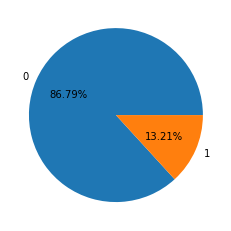

In [12]:
# Let's check the percentage in a pie graph, we can see the ratio of value 1 and 0 is about 1:6. 
target_df = var_pct(df['target'])
plt.pie(target_df.number, labels=target_df.index, autopct='%.2f%%')
plt.show()

#### Then we use the same function var_pct() and go through all the varaiables to check the details of their values.
#### by doing so we realize there is something wrong with the value input in 'company_size', as you can see below:

In [13]:
var_pct(df['company_size'])

,number,percentage
NaN,4779,26.03
50-99,3120,16.99
100-500,2698,14.70
10000+,2044,11.13
10/49,1466,7.99
1000-4999,1399,7.62
<10,1360,7.41
500-999,902,4.91
5000-9999,591,3.22


#### The incorrect input is value '10/49' and '100-500', which should be '10-49' and '100-499'.
#### Therefore we use the code below to correct the input.

In [14]:
# Create a function to replace value in a certain column.
def replace(col, var, var2):
    df.loc[df[col] == var, col]= var2

In [15]:
# Correct value '10/49' and '100-500'
replace('company_size', '10/49', '10-49')
replace('company_size', '100-500', '100-499')

In [16]:
# Afer correcting input
var_pct(df['company_size'])

,number,percentage
NaN,4779,26.03
50-99,3120,16.99
100-499,2698,14.70
10000+,2044,11.13
10-49,1466,7.99
1000-4999,1399,7.62
<10,1360,7.41
500-999,902,4.91
5000-9999,591,3.22


#### Detecing missing values

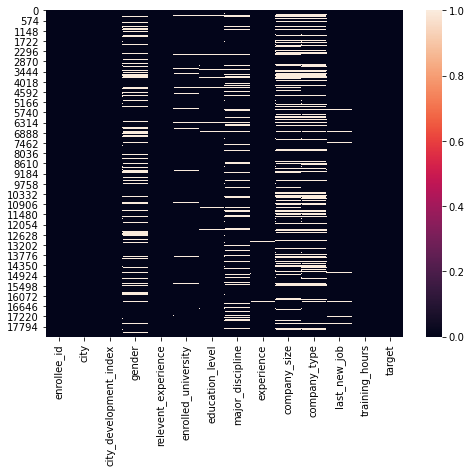

In [17]:
# Visualize patterns of missing values in the dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

In [18]:
# Create a function to calculate missing value percentage in each variable
def null_pct(data):
    nan_p = round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False)
    return pd.DataFrame(nan_p,columns=['percent'])


# Show the variables that has missing value
null_pct(df).loc[null_pct(df).percent !=0]

,percent
company_type,27.45
company_size,26.03
gender,22.32
major_discipline,15.46
education_level,2.49
last_new_job,2.00
enrolled_university,1.86
experience,0.32


## Data Cleaning

### Missing Value Imputation

#### We will fill the missing value with the most common value in each column by using the function below:

In [19]:
# Fill missing value with the most common value in each column
def fill_na(data):
    for i in data.columns:
        data[i].fillna(data[i].mode()[0],inplace=True)
        
        
fill_na(df)

#### Fill the rest of the columns have missing values with the same method(fill na value with mode())

In [20]:
# Make sure there's no more missing values in the dataset by calling null_pct() on the dataset.
null_pct(df)

,percent
target,0.0
training_hours,0.0
last_new_job,0.0
company_type,0.0
company_size,0.0
experience,0.0
major_discipline,0.0
education_level,0.0
enrolled_university,0.0
relevent_experience,0.0


### Duplicated Value Cleaning

In [21]:
# Check duplicate values
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


#### We can see there's no duplicated value

### Categorical Variable Grouping and Encoding

##### Before encoding our categorical variables, we would like to remind us of the percentage of unique values in each variable,
##### if the percentage is very high, means there're many unique values in that variable. 
##### And after going through the value breakdown for each variables,
##### we noticed that some of the unique values may have a very small share (in that variable).
##### In situation like this we can think of combining those values to one group, in order to make the data more efficient when we train the model.
##### Therefore We would like to create a rule that If a variable has more than 5 unique values:
  + 1) we would take a deep look at these variables to see if we can group their minority values to one group.
(If the value's percentage is lower than a $certain$ $threshold$, we consider it as $minority$.)
  + 2) if there's no significant minority value, we would then try to group the values based on other criteria.


##### By doing this our future encoding work will get more efficient. 
##### Afer grouping values, we would go ahead to encode them by manual mapping them with numbers 1,2,3 etc.
##### Let's start with filtering out these variable first.

In [22]:
# Filter out all the categorical columns
obj_col = df.select_dtypes(include=['object']).columns


# Then filter out categorical column that has more than 5 unique values and name the column list 'obj_col_5'
obj_col_5 = []
for i in obj_col:
    if df[i].unique().shape[0] > 5:
        obj_col_5.append(i)
        
obj_col_5

['city',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

##### After filtering out the variables that have more than 5 unique values, we will take a look at their unique value count and percentage as below:

In [23]:
# Check the number and percentage of unique value in obj_col_5
unique_var_pct(df[obj_col_5])

,number,percentage
city,123,0.6700
experience,22,0.1198
company_size,8,0.0436
major_discipline,6,0.0327
company_type,6,0.0327
last_new_job,6,0.0327


##### While checking value breakdown for each column (variable) in the previous stage, 
##### we noticed some of these variables we listed up above, do contain values that have significant low percentage.(Have minority group)
##### These variables are:
##### $city$, 
##### $major$_$discipline$, 
##### $company$_$type$.
##### Let's see their value breakdown for these three variables by calling function var_pct()

In [24]:
# breakdown for 'city'
var_pct(df['city'])

,number,percentage
city_103,4358,23.74
city_21,1672,9.11
city_16,1654,9.01
city_114,1472,8.02
city_160,827,4.50
...,...,...
city_166,4,0.02
city_155,4,0.02
city_107,4,0.02
city_171,2,0.01


In [25]:
# breakdown for 'major_discipline'
var_pct(df['major_discipline'])

,number,percentage
STEM,16576,90.29
Humanities,688,3.75
Other,343,1.87
Business Degree,307,1.67
Arts,239,1.30
No Major,206,1.12


In [26]:
# breakdown for 'company_type'
var_pct(df['company_type'])

,number,percentage
Pvt Ltd,15090,82.19
Funded Startup,1038,5.65
Public Sector,996,5.43
Early Stage Startup,582,3.17
NGO,534,2.91
Other,119,0.65


##### We can see from above that:
1) $city$: There are 123 different cities in the dataset, but some of them only appear a few time. 
Therefore we make a threshold for city: if the percentage of a city is lower than 0.3% (appear less than 50 times), 
we group all of them to 'Other' group.

2) $major$_$discipline$: Major 'STEM' counts more than 90% of the total values. Therefore we combine the rest of the 5 majors to a new group and name it 'group_0', then we rename 'STEM' as group_1. Using value 0 and 1 to represent 'group_0' and 'group_1' respectively.

3) $company$_$type$: 'Pvt Ltd' counts more than 80% of the total values, and type 'Early Stage Startup' , 'NGO', and 'Other' all count less than 5%. Thus we combine 'Early Stage Startup' , 'NGO', and 'Other' to a new group and name it 'group_3'. 'Pvt Ltd' will be renamed as group_4, 'Funded Startup' as group_2, 'Public Sector' as group_1. We then use value 1,2,3,4 to represent group_1 ~ group_4.


##### We will create a function below to filter out the minority values in these 3 variables and replace them with certain value.

In [27]:
# 'data' represents the data for the variable, 'ration' represents the threshold, 
# 'col' represents the variable/column name, 'val' represent the new value after replacement.
def group_mino(data, ratio, col,val):
    mino_count = (var_pct(data).percentage <= ratio).sum()
    mino_list = var_pct(data).percentage.where(var_pct(data).percentage <= ratio).nlargest(mino_count)
    for i in list(mino_list.index):
        replace(col,i,val)


##### Then we group variable 'city' by using this function.

In [28]:
# Call the group_mino() function on 'city'. 
# Make the ratio 0.3%, if any value that its percentage is lower than 3%, we will change their value to 'Other'
group_mino(df['city'], 0.3, 'city', 'Other')

In [29]:
# Check how much did the data shrinked after grouping
print('We shrinked the city number from 123 to', var_pct(df['city']).shape[0])

We shrinked the city number from 123 to 48


##### Next we will group variable 'major_discipline'.

In [30]:
# Call the group_mino() on 'major_discipline', if any value that its percentage is lower than 90%, we replace their value with value 0.
group_mino(df['major_discipline'], 90, 'major_discipline', 0)
    
    
# Replace the rest of the values, which is 'STEM' with value '1'
for i in df['major_discipline']:
    if i == 'STEM':
        replace('major_discipline', i, 1)

print('unique value before grouping: ', 6)
print('unique value after grouping: ', 2)

unique value before grouping:  6
unique value after grouping:  2


##### Next we will group variable 'company_type'

In [31]:
# call the function group_mino() on 'company_type', if any value that its percentage is lower than 5%, we replace their value with value 3.
# As we explained earlier, 'Early Stage Startup' , 'NGO', and 'Other' which its percentage is lower than 5% will be combined together.
# And after the combination, the new percentage will be the second highest in this group, that's why we replace it with value 3,
# As the value(Pvt Ltd) has the highest percentage will be replaced by 4.
group_mino(df['company_type'], 5, 'company_type', 3)


# Replace the rest of the value 'Pvt Ltd' with value 4, 'Funded Startup' with value 2, 'Public Sector' with value 1
for i in df['company_type']:
    if i == 'Pvt Ltd':
        replace('company_type',i,4)
    elif i == 'Funded Startup':
        replace('company_type', i, 2)
    elif i == 'Public Sector':
        replace('company_type',i,1)
        
        
print('unique value before grouping: ', 6)
print('unique value after grouping: ', 4)

unique value before grouping:  6
unique value after grouping:  4


##### After grouping and encoding variables that has minority value (we didn't encode 'city' as we will use a different method to encode this variable),
##### we will encode the rest of the variables in obj_col_5* by manually mapping them based on a certain criteria.
##### The remaining variables in obj_col_5* are: 
##### $experience$, 
##### $company$_ $size$, 
##### $last$_ $new$_ $job$.
###### **obj_col_5*: A list we made previously that contains categorical variables that has more than 5 unique values.

##### First let's taka a look at 'experience'

In [32]:
var_pct(df['experience'])

,number,percentage
>20,3496,19.04
5,1309,7.13
4,1250,6.81
3,1159,6.31
6,1125,6.13
2,992,5.40
9,979,5.33
10,967,5.27
7,950,5.17
8,755,4.11


In [33]:
# To make further data processing easier let's call function replace(), 
# to replace value '>20' and '<1' with value '21', '0' respectively.
replace('experience', '<1', '0')
replace('experience', '>20', '21')


# convert the 'experience' value from str to int
df['experience'] = df['experience'].astype(int)

In [34]:
# Check the value of 'experience', we can see it's from 0 to 21.
# 0 represents less than 1 year, 21 represents more than 20 years
sorted(var_pct(df['experience']).index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [35]:
# Group experience year to 4 groups: 
# Group_1: <= 5 years
# group_2: <= 10 years
# group_3: <= 20 years
# group_4: > 20 years
# Use value 1,2,3,4 to represent group_1 ~ group_4

for i in df['experience'] :
    if i <=5:
        replace('experience', i, '1')
    elif i <= 10:
        replace('experience', i, '2')
    elif i <=20:
        replace('experience', i, '3')
    else:
        replace('experience', i, '4') 

print('unique value before grouping: ', 22)
print('unique value after grouping: ', 4)

unique value before grouping:  22
unique value after grouping:  4


In [36]:
## *************
# for i in df['experience'] :
#     if i <=5:
#         replace('experience', i, '0~5 years')
#     elif i <= 10:
#         replace('experience', i, '6~10 years')
#     elif i <=20:
#         replace('experience', i, '11~20 years')
#     else:
#         replace('experience', i, '> 20 years') 

# print('unique value before grouping: ', 22)
# print('unique value after grouping: ', 4)

In [37]:
var_pct(df['experience'])

,number,percentage
1,5578,30.38
2,4776,26.01
3,4509,24.56
4,3496,19.04


##### Next, let's take a look at 'company_size'

In [38]:
var_pct(df['company_size'])

,number,percentage
50-99,7899,43.03
100-499,2698,14.70
10000+,2044,11.13
10-49,1466,7.99
1000-4999,1399,7.62
<10,1360,7.41
500-999,902,4.91
5000-9999,591,3.22


In [39]:
# Group company_size to 3 groups: 
# Group_1: employee size less than 100 (small)
# Group_2: employee size less than 1000 (medium)
# Group_3  employee size greater than 1000 (large)
# Use 1,2,3 to represent group_1 ~ group_3

for i in df['company_size']:
    if i in ['<10','10-49','50-99']:
        replace('company_size', i, 1)
    elif i in ['100-499', '500-999']:
        replace('company_size', i, 2)
    elif i in ['1000-4999','5000-9999','10000+']:
        replace('company_size', i, 3)

print('unique value before grouping: ', 8)
print('unique value after grouping: ', 3)

unique value before grouping:  8
unique value after grouping:  3


In [40]:
## *************

# for i in df['company_size']:
#     if i in ['<10','10-49','50-99']:
#         replace('company_size', i, 'less than 100')
#     elif i in ['100-499', '500-999']:
#         replace('company_size', i, 'less than 1000')
#     elif i in ['1000-4999','5000-9999','10000+']:
#         replace('company_size', i, '1000 +')

##### Next, let's check 'last_new_job'

In [42]:
var_pct(df['last_new_job'])

,number,percentage
1,7934,43.22
>4,3339,18.19
2,2835,15.44
never,2186,11.91
4,1038,5.65
3,1027,5.59


In [43]:
# Replace value 'never' (never changed job) with value 0
for i in df['last_new_job']:
    if i == 'never':
        replace('last_new_job', i, 0)

# Replace the rest of the value with value 1 if 'last_new_job' <= 4 years.
# Replace the rest of the value with 2 if 'last_new_job' is longer than 4 years.
for i in df['last_new_job']:
    if i in  ['1','2','3','4']:
        replace('last_new_job',i, 1)
    elif i == '>4':
        replace('last_new_job',i,2)


print('unique value before grouping: ', 6)
print('unique value after grouping: ', 3)

unique value before grouping:  6
unique value after grouping:  3


##### So far we have finished grouping and encoding the categorical variables $that$ $have$ $more$ $than$ $5$ $unique$ $values$.
##### (We didn't encode $city$, as we would use a different encoding method for this variable.)

##### Next let's group and encode the rest of all the categorical variables, which are: 
##### $relevent$_$experience$, 
##### $enrolled$_$university$,
##### $educational$_$level$,
##### $gender$

##### Next let's check 'relevent_experience'

In [44]:
var_pct(df['relevent_experience'])

,number,percentage
Has relevent experience,13596,74.06
No relevent experience,4763,25.94


##### As there are only 2 type of values in the column, 
##### therefore we can just encode them by replacing these two values with 0 and 1 respectively

In [45]:
# Replace 'Has relevent experience' with value 1
replace('relevent_experience','Has relevent experience',1)

# Replace 'No relevent experience' with value 0
replace('relevent_experience','No relevent experience',0)

print('unique value before grouping: ', 2)
print('unique value after grouping: ', 2)

unique value before grouping:  2
unique value after grouping:  2


##### Next let's process 'enrolled_university'

In [46]:
var_pct(df['enrolled_university'])

,number,percentage
no_enrollment,14001,76.26
Full time course,3187,17.36
Part time course,1171,6.38


In [47]:
# Group 'Full time course' and 'Part time course' to group_1, and replace their values with value 1
replace('enrolled_university','Full time course',1)
replace('enrolled_university','Part time course',1)

# Group 'no_enrollment' to group_2 and replace it with value 0
replace('enrolled_university', 'no_enrollment',0)

print('unique value before grouping: ', 3)
print('unique value after grouping: ', 2)

unique value before grouping:  3
unique value after grouping:  2


##### Now let's work on the last one, 'education_level'

In [48]:
var_pct(df['education_level'])

,number,percentage
Graduate,11226,61.15
Masters,4319,23.53
High School,2032,11.07
Phd,459,2.50
Primary School,323,1.76


In [49]:
# Combine 'Graduate', 'Master', 'Phd' to group_1, and replace these values with value 2.
# Combine 'Primary School','High School'to group_2 and replace these values with value 1.

for i in df['education_level']:
    if i in ['Graduate','Masters','Phd']:
        replace('education_level',i,2)
    elif i in ['Primary School','High School']:
        replace('education_level',i,1)

print('unique value before grouping: ', 5)
print('unique value after grouping: ', 2)

unique value before grouping:  5
unique value after grouping:  2


In [50]:
# Check the value of column 'gender'
var_pct(df['gender'])

,number,percentage
Male,16982,92.50
Female,1188,6.47
Other,189,1.03


In [51]:
# Replace the value with value 1,2,3 respectively. label 'Male' as 1, 'Female' as 2, 'Other' as 3. 
replace('gender', 'Male', 1)
replace('gender', 'Female', 2)
replace('gender', 'Other', 3)

print('unique value before grouping: ', 3)
print('unique value after grouping: ', 3)

unique value before grouping:  3
unique value after grouping:  3


### So we have finished encoding for all the categorical variables expect $city$. 

In [52]:
# Check the data shape after dummy encoding. 
df.shape

# We realize there's no change in the shape of our data.

(18359, 14)

In [53]:
# Again, filter out the variabes that has object value, check the data type again after encoding
# We will exclude 'city 'as we haven't encoded it
final_obj_col = df.drop('city',axis=1).select_dtypes(include=['object']).columns
final_obj_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

#### We can see from above even we replaced categorical values with number 1,2,3 ect, the variables data type are still $object$.
#### We could solve this problem by calling this function below on final_obj_col and convert them all at once to $int$. 

In [54]:
# Create a function to convert these object value to int.
def convert(data,list):
    for i in list:
        data[i] = data[i].astype(int)

# Call the function on our dataset and convert the final_obj_col to type int)
convert(df, final_obj_col)

In [55]:
# check the value again.
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

#### Check our dataset after the cleaning.

In [56]:
pd.set_option('display.max_columns', None)  
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,1,1,0,2,1,1,2,4,1,106,0
1,29166,city_83,0.923,1,1,0,2,1,3,1,2,1,69,0
2,46,city_16,0.910,1,1,0,2,1,2,1,1,1,4,0
3,18527,city_64,0.666,1,1,0,2,1,3,1,4,1,26,0
4,21751,city_100,0.887,1,0,0,2,1,2,1,4,1,88,1


#### The last step for data cleaning, let's remove the irrelevant variable for the Data analysis.
#### In this case let's just drop column 'enrollee_id'.

In [57]:
# Drop the first column 'enrollee_id'
df = df.drop('enrollee_id', axis=1)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
gender,18359.0,1.085299,0.314034,1.000,1.000,1.00,1.00,3.000
relevent_experience,18359.0,0.740563,0.438338,0.000,0.000,1.00,1.00,1.000
enrolled_university,18359.0,0.237377,0.425487,0.000,0.000,0.00,0.00,1.000
education_level,18359.0,1.871725,0.334405,1.000,2.000,2.00,2.00,2.000
major_discipline,18359.0,0.902881,0.296127,0.000,1.000,1.00,1.00,1.000
experience,18359.0,2.322621,1.098685,1.000,1.000,2.00,3.00,4.000
company_size,18359.0,1.635547,0.819220,1.000,1.000,1.00,2.00,3.000
company_type,18359.0,3.656899,0.814865,1.000,4.000,4.00,4.00,4.000
last_new_job,18359.0,1.062803,0.544990,0.000,1.000,1.00,1.00,2.000


In [59]:
df.to_csv('preprocessed_train.csv',index=False)